In [50]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [51]:
# Load CSV
train_file_path = '../data/filter_train_set.csv'
test_file_path = '../data/filter_test_set.csv'

In [52]:
train_df = pd.read_csv(train_file_path)
train_df.head()

,Unnamed: 0,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,mean_Relative_gamma,Fp1_Delta,...,O2_Low_beta,O2_Relative_gamma,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,0,-114.341825,-121.488572,-123.828235,-131.472169,-135.139612,-123.128543,-128.672829,0.911121,-108.585469,...,-127.824557,0.900983,-0.002424,-0.001148,-0.003572,-0.002992,0.010864,0.007871,1,1
1,1,-114.839073,-121.304136,-123.781423,-130.799737,-134.596977,-123.236447,-128.949312,0.915596,-110.156485,...,-130.412991,0.916433,-0.005414,-0.008728,-0.014143,-0.001580,0.003520,0.001940,1,1
2,2,-113.316245,-120.735108,-124.310022,-130.503170,-134.414663,-123.339975,-130.710334,0.917608,-111.637451,...,-131.930584,0.918449,-0.003896,-0.004369,-0.008265,0.000281,0.001873,0.002154,1,1
3,3,-113.712446,-122.213827,-123.576121,-128.656480,-135.155641,-123.311830,-127.730350,0.912369,-109.539221,...,-129.857027,0.925494,-0.005195,0.010574,0.005379,-0.005731,0.003617,-0.002114,1,1
4,4,-114.765877,-120.000556,-123.287467,-130.629803,-135.184171,-122.322574,-129.815779,0.904859,-109.297915,...,-131.320020,0.901602,0.001199,-0.002400,-0.001201,-0.007199,0.008931,0.001733,1,1


In [53]:
train_df.shape

(336, 145)

In [54]:
# Check for imbalance
train_df['label'].value_counts()

0    192
1    144
Name: label, dtype: int64

In [55]:
# Select equal number of samples from each label
label_1 = train_df.loc[train_df['label'] == 1]
label_1.shape

(144, 145)

In [56]:
label_0 = train_df.loc[train_df['label'] == 0].sample(n=label_1.shape[0], random_state=999)
label_0.shape

(144, 145)

In [57]:
new_df = pd.concat([label_1, label_0])
new_df['label'].value_counts()

1    144
0    144
Name: label, dtype: int64

In [58]:
# Feature selection/extraction
X_train = new_df[['mean_Relative_gamma', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal']]
y_train = new_df[['label']]

In [59]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)

In [60]:
X_train_scaled = np.zeros_like(X_train)
print(X_train_scaled.shape)

scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_minmax = scalers[i].fit_transform(X_train[:,i].reshape(-1, 1))
    X_train_scaled[:,i] = X_minmax[:,0]

(288, 6)


In [61]:
# Grid serach

# Defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear','poly','rbf', 'sigmoid']} 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

estimator = SVC(max_iter=10000)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=999)
    
grid = GridSearchCV(estimator, 
                    param_grid, 
                    cv=cv,
                    refit = True, 
                    verbose = 0)
  
# Fitting the model for grid search
grid.fit(X_train_scaled, y_train)

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=999, test_size=0.2,
            train_size=None),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf']})

In [62]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1, max_iter=10000)


In [63]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,Unnamed: 0,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,mean_Relative_gamma,Fp1_Delta,...,O2_Low_beta,O2_Relative_gamma,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,24,-106.563534,-117.518044,-119.163180,-121.210991,-122.003780,-118.918563,-121.640062,0.974712,-102.668293,...,-120.810998,0.967308,0.015834,-0.004067,0.011767,-0.005538,-0.002382,-0.007921,2,1
1,25,-109.895296,-115.974923,-119.952579,-121.636300,-121.548432,-118.809397,-120.357681,0.977465,-109.325556,...,-120.075441,0.965690,0.016114,-0.001673,0.014441,-0.004498,-0.003501,-0.007998,2,1
2,26,-108.781528,-116.931811,-118.381171,-121.764624,-121.808047,-118.210122,-120.974709,0.970462,-109.211540,...,-119.295777,0.961370,0.019489,0.008661,0.028150,-0.001538,0.002224,0.000686,2,1
3,27,-107.457264,-117.212969,-119.060554,-121.059615,-122.382355,-118.510982,-120.201859,0.968367,-105.211426,...,-118.858302,0.951453,0.021147,0.000841,0.021989,-0.009708,0.002536,-0.007173,2,1
4,28,-108.771967,-118.015884,-118.094082,-121.236994,-121.839481,-118.314830,-120.384838,0.971071,-106.132535,...,-119.836094,0.960450,0.012418,0.009689,0.022108,-0.008903,-0.002256,-0.011159,2,1


In [64]:
X_test = test_df[['mean_Relative_gamma', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal']]
y_test = test_df[['label']]

In [65]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1)

In [66]:
X_test_scaled = np.zeros_like(X_test)

for i in range(X_test.shape[1]):
    X_test_minmax = scalers[i].transform(X_test[:,i].reshape(-1, 1))
    X_test_scaled[:,i] = X_test_minmax[:,0]

In [67]:
yhat = grid.predict(X_test_scaled)
accuracy_score(y_test, yhat)

0.8888888888888888

In [68]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       0.75      1.00      0.86        24

    accuracy                           0.89        72
   macro avg       0.88      0.92      0.88        72
weighted avg       0.92      0.89      0.89        72



In [72]:
#{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
final_svm = SVC(random_state=999, C=10, gamma=1, kernel='rbf', max_iter=10000)
final_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=1, max_iter=10000, random_state=999)

In [73]:
yhat = final_svm.predict(X_test_scaled)
accuracy_score(y_test, yhat)

0.9027777777777778

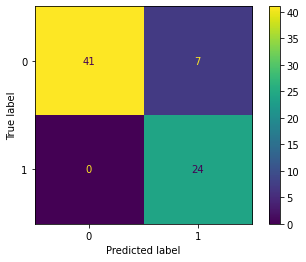

In [74]:
cm = confusion_matrix(y_test, yhat, labels=final_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=final_svm.classes_)
disp.plot()

plt.show()